# Conceptos Básicos ML

## Representación de Datos

Una tabla es una cuadrícula bidimensional de datos, en la que las filas representan elementos individuales del conjunto de datos y las columnas representan cantidades relacionadas con cada uno de estos elementos. 

Por ejemplo, consideremos el conjunto de datos **Iris**, analizado por **Ronald Fisher** en 1936. 

In [18]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Aquí, cada fila de los datos se refiere a una única flor observada y el número de filas es el número total de flores en el conjunto de datos. En general, nos referiremos a las filas de la matriz como muestras (`samples`), y el número de filas como `n_samples`.

De manera similar, cada columna de los datos se refiere a una pieza particular de información que describe cada muestra. En general, nos referiremos a las columnas de la matriz como características (features), y el número de columnas como `n_features`.

### Matriz de características y Arreglo de Etiquetas 

<img src="https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/05.02-samples-features.png"  align="center"  />


#### Matriz de características 
La **matriz de características** (features matrix en inglés) es una representación de los datos de entrada en un problema de aprendizaje automático. Es una matriz bidimensional (con forma `[n_samples, n_features]`), en la que las filas representan las muestras o instancias de los datos, y las columnas representan las características o atributos que describen cada muestra. 

Las características (es decir, columnas) siempre se refieren a las observaciones distintas que describen cada muestra de manera cuantitativa. Las características generalmente tienen valores reales, pero en algunos casos pueden ser valores booleanos o discretos.

Por convención, esta matriz de características a menudo se almacena en una variable llamada `X`.


In [2]:
# features matrix
X = iris.drop('species',axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Arreglo de Etiquetas

Además de la matriz de características `X`, generalmente también trabajamos con un **arreglo de etiquetas** (target array), que por convención generalmente llamamos `y`. El target array suele ser unidimensional, con una longitud de `n_samples`, y generalmente se encuentra en un arreglo NumPy o una Serie de Pandas.

El target array puede tener valores numéricos continuos o clases/etiquetas discretas. Aunque algunos estimadores de Scikit-Learn manejan varios valores de target en forma de una matriz de objetivos bidimensional `[n_samples, n_targets]`, principalmente trabajaremos con el caso común de un target array unidimensional.

In [3]:
# target
y = iris['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

### Conjunto de Entrenamiento y Prueba

El **conjunto de entrenamiento** (train set) y el **conjunto de prueba** (test set) son dos conjuntos de datos distintos que se utilizan en el aprendizaje automático para entrenar y evaluar un modelo.
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/train-and-test-datasets-in-machine-learning.png"  align="center"  />

#### Definición



* El **conjunto de entrenamiento** es un subconjunto de los datos de entrada que se utiliza para ajustar los parámetros del modelo y encontrar la mejor función que pueda predecir la variable de salida a partir de las variables de entrada. En otras palabras, se utiliza para entrenar el modelo.

* El **conjunto de prueba** es otro subconjunto de los datos de entrada que se utiliza para evaluar el rendimiento del modelo. Este conjunto de datos no se utiliza en el entrenamiento del modelo, sino que se utiliza únicamente para evaluar el rendimiento del modelo en datos nuevos y no vistos durante el entrenamiento.

<img src="https://developers.google.com/static/machine-learning/crash-course/images/TrainingDataVsTestData.svg"  
      width = "700" align="center"  />

La función `train_test_split` de Scikit-learn es una herramienta útil para dividir un conjunto de datos en conjuntos de entrenamiento y prueba.

La función `train_test_split` toma como entrada los datos que se van a dividir, junto con los valores correspondientes de la variable de respuesta. La función también permite ajustar la proporción de datos que se asignarán al conjunto de entrenamiento y al conjunto de prueba. Por defecto, la proporción es del 75% para el conjunto de entrenamiento y el 25% para el conjunto de prueba.

Para esto, podemos utilizar la función `train_test_split`:

In [26]:
from sklearn.model_selection import train_test_split

# separar informacion
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42)

In [27]:
print(f"dimensiones de X_train: {X_train.shape}")
print(f"dimensiones de y_train: {y_train.shape}")
print("")
print(f"dimensiones de X_test:   {X_test.shape}")
print(f"dimensiones de y_test:   {y_test.shape}")

dimensiones de X_train: (90, 4)
dimensiones de y_train: (90,)

dimensiones de X_test:   (60, 4)
dimensiones de y_test:   (60,)


#### Motivación

La razón de utilizar dos conjuntos de datos separados para entrenar y evaluar el modelo es evitar el sobreajuste (**overfitting**) del modelo. El sobreajuste ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento y no generaliza bien a nuevos datos. Si se utilizan los mismos datos para entrenar y evaluar el modelo, es probable que el modelo tenga un buen rendimiento en los datos de entrenamiento pero un rendimiento pobre en datos nuevos.

<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png"  align="center" width = "700"  />

#### Reglas de separación

En general, se divide el conjunto de datos de entrada en dos conjuntos: el conjunto de entrenamiento y el conjunto de prueba. El conjunto de entrenamiento suele ser el 70-80% del conjunto de datos y el conjunto de prueba el 20-30%. La proporción puede variar según el tamaño del conjunto de datos y la complejidad del modelo.

A modo de regla empírica, se considerará el tamaño óptimo basado en la siguiente tabla:

| número de filas      | train set | test set |
|----------------------|-----------|----------|
| entre 100-1000       | 67%       | 33%      |
| entre 1.000- 100.000 | 80%       | 20%      |
| mayor a 100.000      | 99%       | 1%       |

#### Más información
Es importante destacar que, en algunos casos, se utiliza un tercer conjunto de datos, llamado **conjunto de validación** (validation set), que se utiliza para ajustar los hiperparámetros del modelo y evitar el sobreajuste. En este caso, 

* el conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo, 
* el conjunto de validación se utiliza para ajustar los hiperparámetros 
* y el conjunto de prueba se utiliza para evaluar el rendimiento final del modelo.

<img src="https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png" width = "600"  align="center"  />

## Error de estimación

El **error de estimación** se refiere a la diferencia entre el valor real de una variable y el valor estimado por un modelo. En el contexto de los modelos de aprendizaje automático, el error de estimación se refiere a la diferencia entre la variable objetivo (también conocida como variable dependiente o variable de respuesta) y la variable predicha por el modelo.

El objetivo de los modelos de aprendizaje automático es **minimizar el error de estimación** y, por lo tanto, mejorar la precisión del modelo en la predicción de valores desconocidos. El error de estimación se puede calcular utilizando diferentes métricas según el tipo de modelo y el objetivo del análisis. 


Para medir el error de estimación en machine learning es necesario identificar el tipo de dato del **target**: **numéricos** o **categóricos**.

<img src="https://images.ctfassets.net/dkgr2j75jrom/A6Xf1MfISZhiQWuyGFDpV/708d5fd82c14d8db6eb0d4af1c27d525/PillarPage-Qual-Quan-3.svg" width = "600"  align="center"  />

### Error de estimación: Datos Numéricos

En este caso, el **error de estimación** corresponde a la diferencia entre el valor original y el valor predicho,es decir:

$$e_{i}=y_{i}-\hat{y}_{i} $$


<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_supervisado_regresion/images/error.png" width="480" height="360" align="rigt"/>


Veamos un ejemplo práctico:

In [6]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# semilla
np.random.seed(42)

# Crear un conjunto de datos de ejemplo
rng = np.random.RandomState(42)

n = 50
x = np.arange(n)+1
y1 = 2*x  
y2 = 2*x + 2*rng.randn(n)

df = pd.DataFrame({
    'x':x,
    'y': y1,
    'y_hat':y2
})

df.head()

,x,y,y_hat
0,1,2,2.993428
1,2,4,3.723471
2,3,6,7.295377
3,4,8,11.046060
4,5,10,9.531693


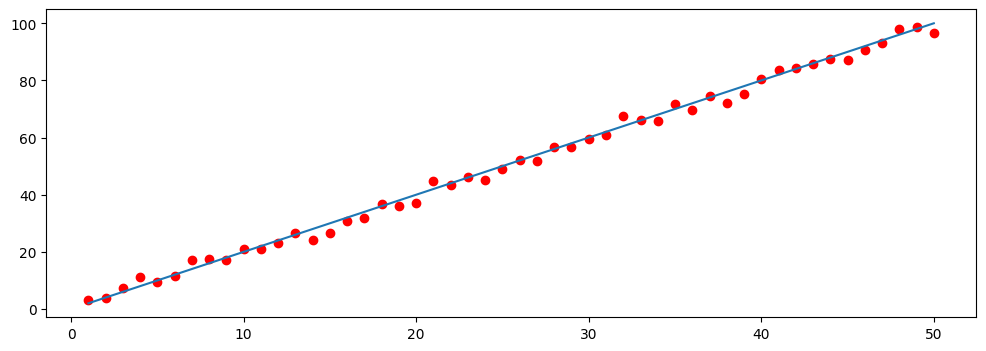

In [7]:
# visualizar resultados
plt.rcParams["figure.figsize"] = (12,4)
plt.scatter(df['x'],df['y_hat'], color='red')
plt.plot(df['x'],df['y']);

Nuestra línea azul corresponde a los valores originales, mientras que los puntos rojos corresponde a los valores estimados. 

Veamos el error de estimación entre el valor original ($y$) y el valor estimado ($\hat{y}$):

In [8]:
# error
y_original = np.array(df['y'])
y_estimado = np.array(df['y_hat'])

error_estimacion = y_original-y_estimado
error_estimacion

array([-0.99342831,  0.2765286 , -1.29537708, -3.04605971,  0.46830675,
        0.46827391, -3.15842563, -1.53486946,  0.93894877, -1.08512009,
        0.92683539,  0.93145951, -0.48392454,  3.82656049,  3.44983567,
        1.12457506,  2.02566224, -0.62849467,  1.81604815,  2.8246074 ,
       -2.93129754,  0.4515526 , -0.13505641,  2.84949637,  1.08876545,
       -0.22184518,  2.30198715, -0.75139604,  1.20127738,  0.5833875 ,
        1.20341322, -3.70455637,  0.02699445,  2.11542186, -1.64508982,
        2.4416873 , -0.41772719,  3.91934025,  2.6563721 , -0.39372247,
       -1.47693316, -0.34273656,  0.23129656,  0.60220739,  2.95704398,
        1.43968842,  0.92127754, -2.11424445, -0.68723658,  3.52608031])

Este resultado nos da el **error de estimación** por cada muestra (o fila). Para encontrar un resultado que resuma el **error de estimación** utilizaremos **funciones de distancias** o **métricas de estimación**.


1. **Métricas absolutas**: Las métricas absolutas o no escalada miden el error sin escalar los valores. Las métrica absolutas más ocupadas son:

    *  **Mean Absolute Error** (MAE)

    $$\textrm{MAE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n}\left | y_{t}-\hat{y}_{t}\right |$$

    *  **Root Mean Squared Error** (RMSE):

    $$\textrm{RMSE}(y,\hat{y}) =(\dfrac{1}{n}\sum_{t=1}^{n}\left ( y_{t}-\hat{y}_{t}\right )^2)^{1/2}$$

2. **Métricas Porcentuales**: Las métricas porcentuales o escaladas miden el error de manera escalada, es decir, se busca acotar el error entre valores de 0 a 1, donde 0 significa que el ajuste es perfecto, mientras que 1 sería un mal ajuste. Cabe destacar que muchas veces las métricas porcentuales puden tener valores mayores a 1.Las métrica Porcentuales más ocupadas son:

    * **Mean absolute percentage error** (MAPE):
    
    $$\textrm{MAPE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n}\left | \frac{y_{t}-\hat{y}_{t}}{y_{t}} \right |$$

    
Veamos un ejemplo práctico, las métricas de estimación  las podemos obtener desde `sklearn.metrics`:

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_original,y_estimado)
rmse = mean_squared_error(y_original,y_estimado)
mape = mean_absolute_percentage_error(y_original,y_estimado)

print(f"mae:  {round(mae,4)}")
print(f"rmse: {round(rmse,4)}")
print(f"mape: {round(mape,4)}")

mae:  1.5328
rmse: 3.6206
mape: 0.0586


**¿ Cómo saber cuál es la mejor estimación entre dos estimaciones?**

Supongamos que tenemos dos estimaciones $\hat{y}_{1}$ y $\hat{y}_{2}$, aquel que tenga un error de estimación más bajo en las **métricas de estimación** corresponderá al mejor modelo. 

Definamos una segunda estimación ($\hat{y}_{2}$) y analicemos las métricas de estimación:

In [10]:
# definir otra estimacion
y_estimado_2 = y_estimado+rng.randn(n)

# error estimacion segunda estimacion
mae_2 = mean_absolute_error(y_original,y_estimado_2)
rmse_2 = mean_squared_error(y_original,y_estimado_2)
mape_2 = mean_absolute_percentage_error(y_original,y_estimado_2)

print(f"mae_2:  {round(mae_2,4)}")
print(f"rmse_2: {round(rmse_2,4)}")
print(f"mape_2: {round(mape_2,4)}")

mae_2:  1.8174
rmse_2: 4.7062
mape_2: 0.0671


Si tomamos en cuanta todas las métricas entre la primera estimación ($\hat{y}_{1}$) y la segunda ($\hat{y}_{2}$) observamos que:

* $MAE_{1}<MAE_{2}$
* $RMSE_{1}<RMSE_{2}$
* $MAPE_{1}<MAPE_{2}$

En este caso, todas las métricas de estimación para el primer caso son menores las métricas de estimación para el segundo caso, por lo tanto, la primera estimación ($\hat{y}_{1}$) es mejor que la segunda ($\hat{y}_{2}$).


### Error de estimación: Datos Categóricos

Para entender el **error de estimación** es necesario entender algunos conceptos previamente, como lo es la **matriz de confusión**. Primero daremos un ejemplo intuitivo, los valores de $y$ corresponde a valores categóricos (**ejemplo**: alto y bajo). A menudo, estos valores se transforman números enteros  (**ejemplo**: alto = 1 y bajo=0). Trataremos de contar las veces que la estimación ($\hat{y}$) coincide con el valor original ($y$).


<img src="https://www.researchgate.net/publication/335080302/figure/fig1/AS:790214687600646@1565413271171/Classification-error-calculation.png"  align="rigt"/>


Veamos un ejemplo prático en donde analizamos un problema de **clasificación binaria**, es decir, con solo dos categorías:

In [11]:
import numpy as np 

# semilla
np.random.seed(1)


y = np.random.randint(2, size=150)
yhat = np.random.randint(2, size=150)

df = pd.DataFrame({
    'y':y,
    'y_estimado':yhat
})

df['coincidencia'] = df['y']==df['y_estimado']

df.head()

,y,y_estimado,coincidencia
0,1,1,True
1,1,1,True
2,0,0,True
3,0,1,False
4,1,0,False


En este caso, la columna **coincidencia** corresponde los casos donde $y_{i}$ e $\hat{y}_{i}$ son iguales:

In [12]:
# total de coincidencias
df['coincidencia'].value_counts()

True     88
False    62
Name: coincidencia, dtype: int64

En este caso, sabemos que acertamos en **88** oportunidades, sin embargo, esto no nos da más detalles en que **clase** estamos acertando de mejor manera.

**Matriz de confusión**

La **matriz de confusión** es una herramienta que permite la visualización del desempeño de un algoritmo 
Para la clasificación binaria (por ejemplo, 0 y 1), se tiene la siguiente matriz de confusión:

<img src="https://live.staticflickr.com/65535/48051372813_0e6a4a0806_b.jpg"  align="center"/>

Acá se define:

* **TP = Verdadero positivo**: el modelo predijo la clase positiva correctamente, para ser una clase positiva.
* **FP = Falso positivo**: el modelo predijo la clase negativa incorrectamente, para ser una clase positiva.
* **FN = Falso negativo**: el modelo predijo incorrectamente que la clase positiva sería la clase negativa.
* **TN = Verdadero negativo**: el modelo predijo la clase negativa correctamente, para ser la clase negativa.

En este contexto, los valores **TP** Y **TN** muestran los valores correctos que tuve al momento de realizar la predicción, mientras que los valores de de **FN** Y **FP** denotan los valores que me equivoque de clase.

Los conceptos de **FN** y **FP** se pueden interpretar con la siguiente imagen:

<img src="https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/docs/lectures/ml/analisis_supervisado_clasificacion/images/error.jpg" width="600" height="360" align="center"/>

Calculemos la matriz de confusión utilizando el comando `confusion_matrix`:

In [13]:
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(df['y'],df['y_estimado'])

print('\nMatriz de confusion:\n ')
print(cm)


Matriz de confusion:
 
[[42 26]
 [36 46]]


**Métricas de estimación**

En este contexto, se busca maximizar el número al máximo la suma de los elementos **TP** Y **TN**, mientras que se busca disminuir la suma de los elementos de **FN** y **FP**. Para esto se definen las siguientes métricas:


1. **Accuracy**

$$accuracy(y,\hat{y}) = \dfrac{TP+TN}{TP+TN+FP+FN}$$

2. **Recall**:

$$recall(y,\hat{y}) = \dfrac{TP}{TP+FN}$$

3. **Precision**:

$$precision(y,\hat{y}) = \dfrac{TP}{TP+FP} $$

4. **F-score**:

$$fscore(y,\hat{y}) = 2\times \dfrac{precision(y,\hat{y})\times recall(y,\hat{y})}{precision(y,\hat{y})+recall(y,\hat{y})} $$


Veamos un ejemplo práctico, las métricas de estimación  las podemos obtener desde `sklearn.metrics`:

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(df['y'],df['y_estimado'])
recall = recall_score(df['y'],df['y_estimado'])
precision = precision_score(df['y'],df['y_estimado'])
fscore = f1_score(df['y'],df['y_estimado'])

print(f"accuracy:  {round(accuracy,4)}")
print(f"recall:    {round(recall,4)}")
print(f"precision: {round(precision,4)}")
print(f"fscore:    {round(fscore,4)}")

accuracy:  0.5867
recall:    0.561
precision: 0.6389
fscore:    0.5974


En este caso, todas lás métricas estan cercanos a un valor de **0.6** (bien lejos del valor **1** esperado/soñado), esto nos dice que la estimación para este caso no es la mejor. 

**Curva ROC y AUC**

<img src="https://polmartisanahuja.com/wp-content/uploads/2021/01/word-image.png" width="600" height="360" align="center"/>

La **curva ROC** (Receiver Operating Characteristic) se utiliza para evaluar el rendimiento de los algoritmos de clasificación binaria, es decir, entre dos clases o categorías (1 o 0, Verdadero o Falso, etc.). La curva ROC proporciona una representación gráfica, en lugar de un valor único como la mayoría de las otras métricas.

Antes de todo, aclaremos que en la clasificación binaria, hay cuatro resultados posibles para una predicción: **Verdadero positivo (TP), Falso positivo (FP), Verdadero negativo (TN) y Falso negativo (FN)**.

<img src="https://polmartisanahuja.com/wp-content/uploads/2021/01/image-for-post-10-e1610536842121.png" width="600" height="360" align="center"/>

La curva ROC se genera calculando y trazando la **tasa de verdaderos positivos (TPR)** contra la tasa de **falsos positivos (FPR)** para un solo clasificador en una variedad de umbrales (en el siguiente párrafo se definen matemáticamente ambas tasas). Por ejemplo, en un modelo de regresión logística, el umbral sería sobre la probabilidad predicha de una observación perteneciente a la clase positiva. Normalmente, en la regresión logística, si se predice que una observación será positiva con una probabilidad mayor que 0.5, se etiqueta como positiva. Sin embargo, realmente podríamos elegir cualquier umbral entre 0 y 1 (0.1, 0.3, 0.6, 0.99, etc.), y, de este modo, la curva ROC nos ayudaría a visualizar cómo estas elecciones afectan al rendimiento del clasificador.

La **tasa de verdaderos positivos (TPR)**, o **Sensibilidad**, se define como:

$$TPR= \dfrac{TP}{TP+FN}$$

donde **TP** es el número de Verdaderos positivos y **FN** es el número de Falsos negativos. La tasa de verdaderos positivos es una medida de la probabilidad de que una instancia positiva real se clasifique como positiva.

La **tasa de falsos positivos (FPR)**, o **1 – Especificidad**, se define como:

$$FPR= \dfrac{FP}{FP+TN}$$

donde **FP** es el número de Falsos positivos y **TN** es el número de Verdaderos negativos. La tasa de falsos positivos es esencialmente una medida de la frecuencia con la que se producirá una «falsa alarma», o la frecuencia con la que una instancia negativa real se clasificará como positiva.

En la siguiente figura se muestra como sería la curva ROC para tres hipotéticos clasificadores distintos.

<img src="https://polmartisanahuja.com/wp-content/uploads/2021/01/image-for-post-13-e1610536964827.png" width="600" height="360" align="center"/>

La línea de puntos gris representa un clasificador aleatorio (equivalente a «adivinar al azar»); su curva ROC consiste en una línea recta diagonal de pendiente 1. Opuestamente, la línea violeta representa un clasificador perfecto, es decir, que no comete ningún error (uno con una tasa de verdaderos positivos del 100% y una tasa de falsos positivos del 0%).

Casi todos los ejemplos del mundo real se ubicarán en algún lugar entre estas dos líneas; no es perfecto, pero proporciona más poder de predicción que la suposición aleatoria. Por lo general, lo que buscamos es un clasificador que mantenga una alta tasa de verdaderos positivos y al mismo tiempo tenga una baja tasa de falsos positivos; este clasificador ideal tendería a pasar muy próximo a la esquina superior izquierda de la figura anterior, casi rozando a la línea púrpura.

**El AUC**

Si bien es útil visualizar la curva ROC de un clasificador binario, en muchos casos podemos resumir esta información en una sola métrica: el **AUC**. El **AUC** significa **área bajo la curva (ROC)** en inglés. Generalmente, cuanto mayor es la puntuación AUC, mejor es el rendimiento de un clasificador binario para una tarea de clasificación dada.

La siguiente figura muestra que para un clasificador sin poder predictivo (es decir, de predicción aleatoria), el AUC es 0.5, y para un clasificador perfecto, el AUC es 1.0; esto es el área bajo sus correspondientes curvas ROC.

<img src="https://polmartisanahuja.com/wp-content/uploads/2021/01/word-image-1-e1610537035631.png" width="600" height="360" align="center"/>

La mayoría de los clasificadores estarán entre 0.5 y 1.0, con la rara excepción de que el clasificador funcione peor que la predicción aleatoria (AUC<0.5); en este caso se estarían efectuando predicciones invertidas, es decir, se tendería a predecir la clase negativa cuando esta fuera realmente positiva y viceversa.

**¿Por qué usar las curvas ROC?**

* Una ventaja que presentan las curvas ROC es que nos ayudan a encontrar un umbral de clasificación que se adapte a nuestro problema específico.

    * **Ejemplo**: si estuviéramos evaluando un clasificador de correo no deseado, querríamos que la tasa de falsos positivos fuera realmente baja. No queríamos que nadie perdiera un correo electrónico importante en el filtro de spam solo porque nuestro algoritmo es demasiado agresivo. Probablemente, incluso permitiríamos una buena cantidad de correos electrónicos no deseados reales (verdaderos positivos) a través del filtro solo para asegurarnos de que no se perdieran correos electrónicos importantes.

    * **Ejemplo**: si nuestro clasificador estuviera prediciendo si alguien tiene una enfermedad terminal, podríamos estar de acuerdo con un mayor número de falsos positivos (diagnósticos incorrectos de la enfermedad), solo para asegurarnos de que no perdamos ningún positivo verdadero (personas que realmente tienen la enfermedad).

* Además, las curvas ROC y las puntuaciones AUC también nos permiten comparar el rendimiento de diferentes clasificadores para el mismo problema y así poder elegir el de mayor rendimiento.

Continuando con el ejemplo anterior:


In [15]:
from sklearn.metrics import roc_curve, auc

In [16]:
# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(df['y'],df['y_estimado'])
roc_auc = auc(fpr, tpr)

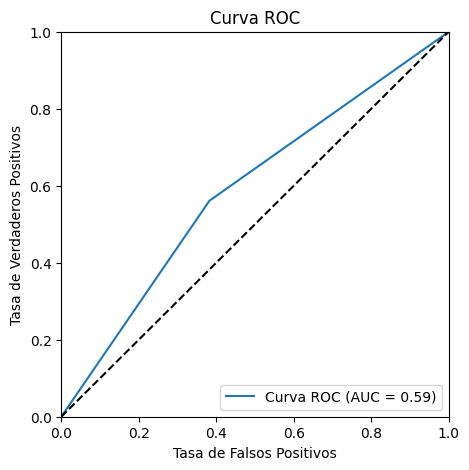

In [17]:
# Graficar la curva ROC
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia para un clasificador aleatorio
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()